# UNSUPERVISED LEARNING

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
%matplotlib inline

## LOAD DATASET

We will use the iris flower data set built into seaborn

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Basic EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

## Visualize Data

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

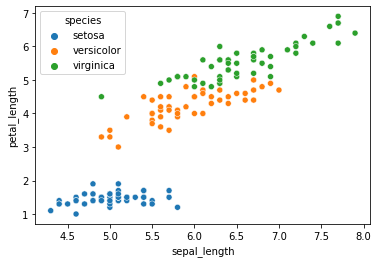

In [7]:
# Sepal length and petal length
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="species")

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

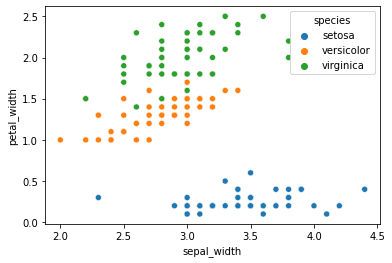

In [8]:
# Sepal width and petal width
sns.scatterplot(data=df, x="sepal_width", y="petal_width", hue="species")

## Define model features and targets
\
For demonstration assume that the column "species" is not known and we try to establish relationships in data and cluster them

In [9]:
# Define numeric columns to fit into data
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
# Define features or inputs, X as a df
X = df[numeric_cols]
X.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### Model Creation - KMEANS Clustering

In [10]:
# Import KMeans from sklearn cluster module

from sklearn.cluster import KMeans

# Create instance of model
model = KMeans(n_clusters=3, random_state=40)

# Fit model to input data or features, X
model.fit(X)

KMeans(n_clusters=3, random_state=40)

In [11]:
# Find the centroid of each cluster
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [12]:
### Make predictions with model
predictions = model.predict(X)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

The numbers indicate the different clusters that each data point falls in

### Determine centers of cluster

In [13]:
# Centers for sepal_length
centers_x = model.cluster_centers_[:,0]
centers_x

array([5.9016129, 5.006    , 6.85     ])

In [14]:
# Centers for petal_length
centers_y = model.cluster_centers_[:,2]
centers_y

array([4.39354839, 1.462     , 5.74210526])

### Visualize predicted labels

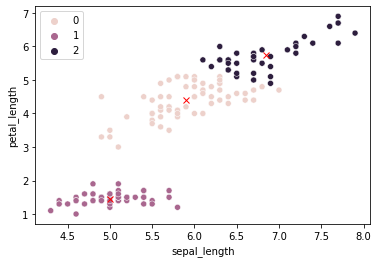

In [15]:
# Plot data points of predictions
sns.scatterplot(data=X, 
                x='sepal_length', 
                y='petal_length', 
                hue=predictions)

# Plot additional markings for centroid
plt.plot(centers_x, centers_y, 'xr')


### Model Evaluation

In [16]:
# Use model.inertia_, to get the sum of squared distances of samples to their closest cluster center (aka variance). 
# Lower the inertia, better the fit.

model.inertia_

78.85144142614602

### Tune model hyperparameters

In [17]:
# Examine model with 6 clusters instead of 3
model2 = KMeans(n_clusters=6, random_state=40)

# Fit model to input features, X
model2.fit(X)


KMeans(n_clusters=6, random_state=40)

In [18]:
# Find cluster centroids
model2.cluster_centers_

array([[5.508     , 2.6       , 3.908     , 1.204     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ]])

In [19]:
# Make predictions with new model
predictions2 = model2.predict(X)
predictions2

array([2, 5, 5, 5, 2, 2, 5, 2, 5, 5, 2, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 5, 5, 2, 2, 2, 5, 5, 2, 2, 2, 5, 5, 2, 2, 5, 2, 2, 5, 5, 2,
       2, 5, 2, 5, 2, 5, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 0, 4, 0, 4, 0, 4,
       4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 1, 4, 3, 1, 1, 3, 0, 3, 1, 3,
       1, 1, 1, 4, 1, 1, 1, 3, 3, 4, 1, 4, 3, 4, 1, 3, 4, 4, 1, 3, 3, 3,
       1, 4, 4, 3, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4])

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

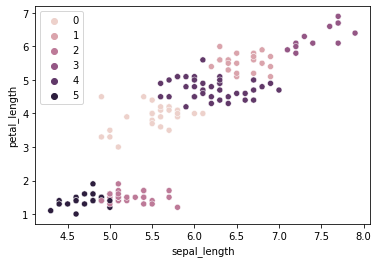

In [20]:
# Visualize new model
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=predictions2)

In [21]:
# Check inertia of the model
model2.inertia_

39.03998724608725

We can see that model2 (with 6 clusters) is a better version as the inertia is lower

Text(0.5, 1.0, 'Cluster Size vs Inertia of KMeans Clustering Model')

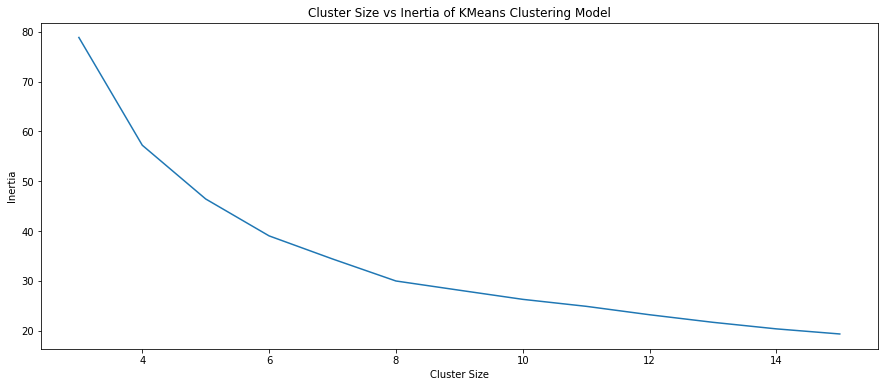

In [22]:
# Examine effect of n_clusters on inertia

inertias = []
ranges = range(3,16)

for i in ranges:
    model = KMeans(n_clusters=i, random_state=40)
    # Fit model to input data, features X
    model.fit(X)
    inertia = model.inertia_
    inertias.append(inertia)
    
# Plot how much inertia changes when the range increases
plt.figure(figsize=(15,6))
sns.lineplot(x=ranges, y=inertias)
plt.xlabel("Cluster Size")
plt.ylabel("Inertia")
plt.title("Cluster Size vs Inertia of KMeans Clustering Model")

In [23]:
inertias

[78.85144142614602,
 57.22847321428572,
 46.44618205128205,
 39.03998724608725,
 34.40900974025975,
 29.990426406926414,
 28.136880454340982,
 26.30627213429845,
 24.90622812713602,
 23.215654929865458,
 21.69687124374481,
 20.381071428571428,
 19.35738605984659]

# DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [26]:
# Create instance of DBSCAN model
model = DBSCAN(eps=0.8, min_samples=4)

# Fit model to training or input features, X
model.fit(X)

DBSCAN(eps=0.8, min_samples=4)

There is no predictions in DBSCAN as it assigns labels to all inputs

In [27]:
# Check the labels from DBSCAN
Y = model.labels_
Y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

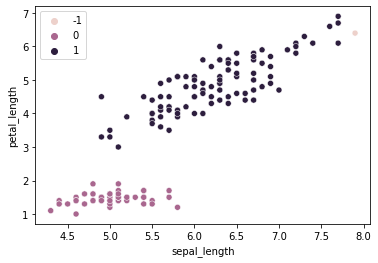

In [28]:
# Visualize results
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=Y)

In [29]:
# Check properties of model
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'algorithm',
 'components_',
 'core_sample_indices_',
 'eps',
 'feature_names_in_',
 'fit',
 'fit_predict',
 'get_params',
 'labels_',
 'leaf_size',
 'metric',
 'metric_params',
 'min_samples',
 'n_features_in_',
 'n_jobs',
 'p',
 'set_params']

# Principal Component Analysis (PCA)

In [31]:
# Load dataset
iris_df = sns.load_dataset('iris')
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [38]:
# Define numerical columns
numeric_cols = list(iris_df.columns)
numeric_cols.remove('species')
numeric_cols

# Define input features, X
X = iris_df[numeric_cols]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
# Import PCA algorithm from sklearn library

from sklearn.decomposition import PCA

In [41]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 | 

In [49]:
# Create instance of model
pca_model = PCA(n_components=2)
# Fit model to input features
pca_model.fit(X)

PCA(n_components=2)

In [50]:
# Check points on the line
pca_model.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [51]:
# Tranform data into 2 dimensions
transformation = pca_model.transform(X)
transformation

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

<AxesSubplot:>

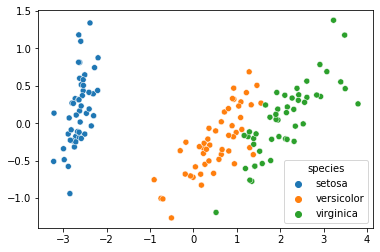

In [55]:
# Visualize PCA
sns.scatterplot(x=transformation[:, 0], 
                y=transformation[:, 1], 
                hue=iris_df["species"])